In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
%matplotlib inline

In [2]:
def processing(n):
    df = pd.read_csv(f'Data/{n}-Features Processed Breast Cancer Data.csv')
    X, y = df.drop(['diagnosis'], axis=1), df['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X, y, X_train, y_train, X_test, y_test


X2, y2, X2_train, y2_train, X2_test, y2_test = processing(2)
X5, y5, X5_train, y5_train, X5_test, y5_test = processing(5)
X10, y10, X10_train, y10_train, X10_test, y10_test = processing(10)
X15, y15, X15_train, y15_train, X15_test, y15_test = processing(15)
X20, y20, X20_train, y20_train, X20_test, y20_test = processing(20)
X25, y25, X25_train, y25_train, X25_test, y25_test = processing(25)
X30, y30, X30_train, y30_train, X30_test, y30_test = processing(30)

In [3]:
datasets = ['X2', 'y2', 'X5', 'y5', 'X10', 'y10', 'X15', 'y15', 'X20', 'y20', 'X25', 'y25', 'X30', 'y30']
output = ""

for dataset in datasets:
    output += (f"{dataset} train shape: {eval(dataset + '_train').shape}\n"
               f"{dataset} test shape: {eval(dataset + '_test').shape}\n\n")

print(output)

X2 train shape: (455, 2)
X2 test shape: (114, 2)

y2 train shape: (455,)
y2 test shape: (114,)

X5 train shape: (455, 5)
X5 test shape: (114, 5)

y5 train shape: (455,)
y5 test shape: (114,)

X10 train shape: (455, 10)
X10 test shape: (114, 10)

y10 train shape: (455,)
y10 test shape: (114,)

X15 train shape: (455, 15)
X15 test shape: (114, 15)

y15 train shape: (455,)
y15 test shape: (114,)

X20 train shape: (455, 20)
X20 test shape: (114, 20)

y20 train shape: (455,)
y20 test shape: (114,)

X25 train shape: (455, 25)
X25 test shape: (114, 25)

y25 train shape: (455,)
y25 test shape: (114,)

X30 train shape: (455, 30)
X30 test shape: (114, 30)

y30 train shape: (455,)
y30 test shape: (114,)




In [5]:
def svm_train_predict(X_train, X_test, y_train, y_test, info):
    
    print(info)
    
    svc = SVC()
    
    train_start_time = time.time()
    model = svc.fit(X_train, y_train)
    train_end_time = time.time()
    
    pred_start_time = time.time()
    y_pred = model.predict(X_test)
    pred_end_time = time.time()
    
    print(f"\nTraining time: {train_end_time - train_start_time} seconds          Prediction time: {pred_end_time - pred_start_time} seconds\n\n")
    
    print(classification_report(y_test, y_pred))
    sns.heatmap(pd.DataFrame(np.array(confusion_matrix(y_test, y_pred, labels=[1, 0])), index=['Actual Malignant', 'Actual Benign'], columns=['Predicted Malignant', 'Predicted Benign']), annot=True)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, lw=2, color='orange', label=f'AUPRC: {auc(recall, precision):.2f})')
    # plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

    # Adding labels and title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Binary Classification')
    plt.legend(loc='best')
    
    plt.show()



x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.004997968673706055 seconds          Prediction time: 0.0010023117065429688 seconds


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



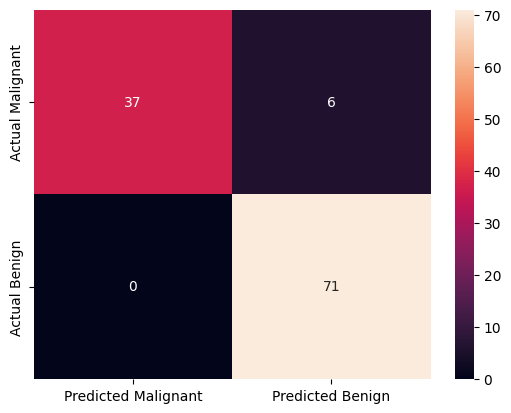

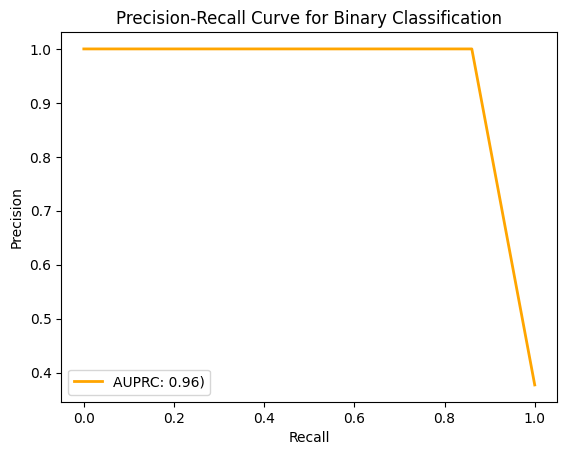

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0030107498168945312 seconds          Prediction time: 0.0009987354278564453 seconds


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



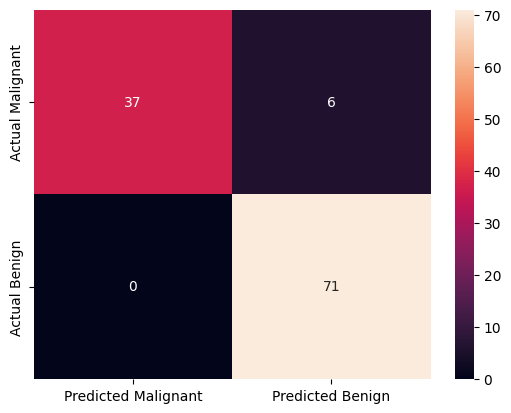

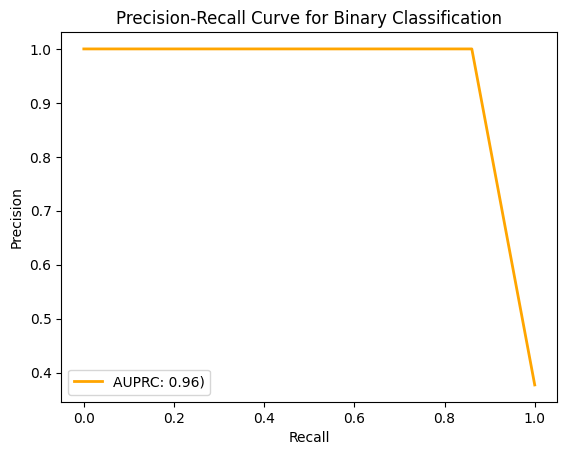

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0029973983764648438 seconds          Prediction time: 0.002004861831665039 seconds


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



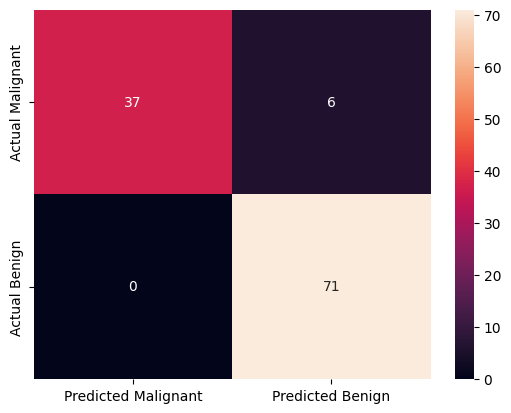

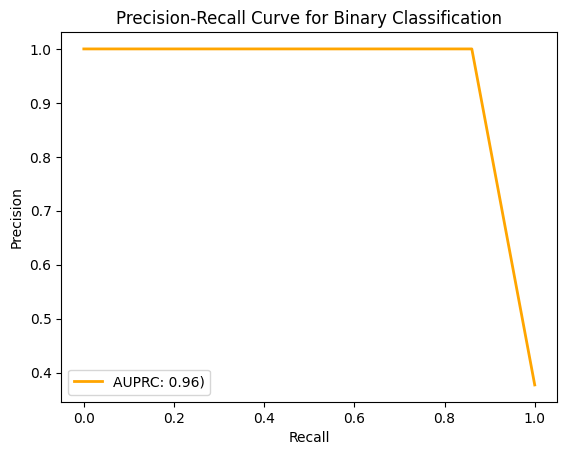

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.004005908966064453 seconds          Prediction time: 0.0009980201721191406 seconds


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



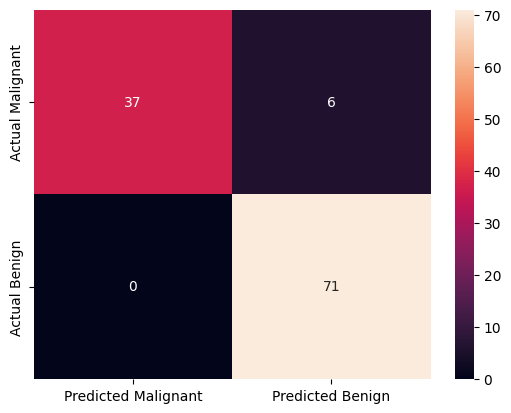

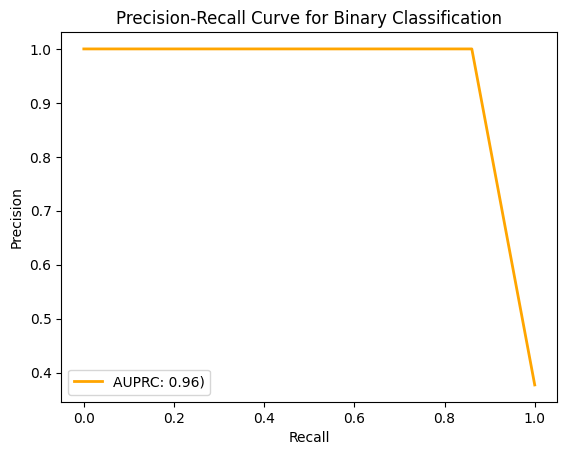

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0029976367950439453 seconds          Prediction time: 0.0020024776458740234 seconds


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



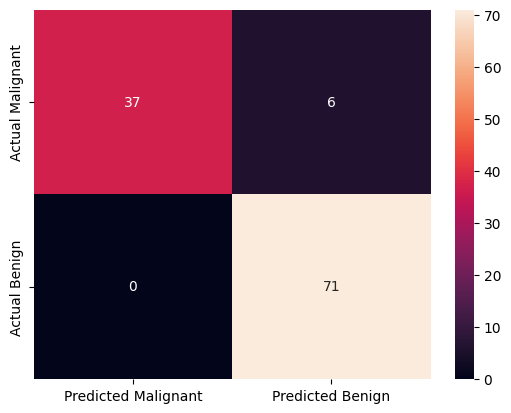

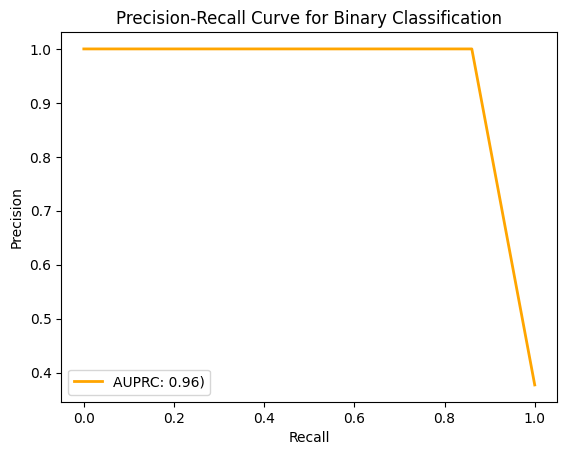

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0039997100830078125 seconds          Prediction time: 0.00099945068359375 seconds


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



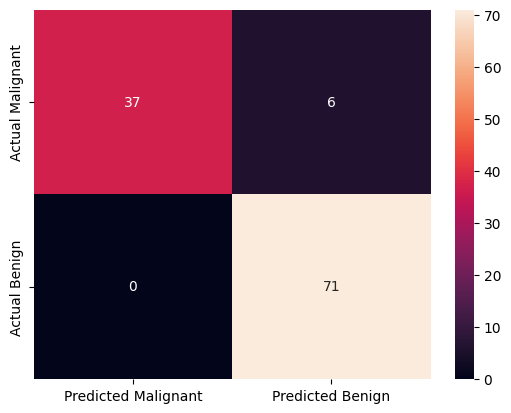

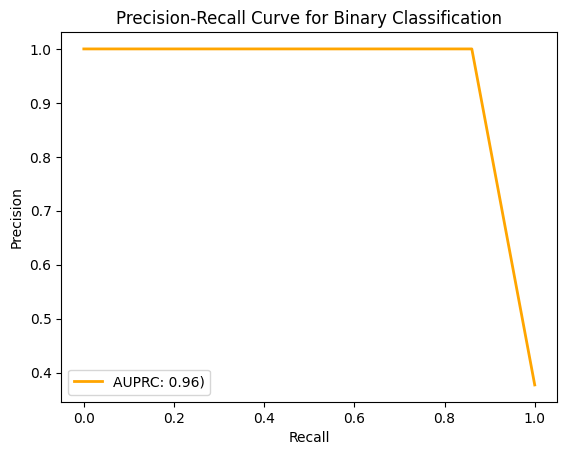

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-30 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.004000186920166016 seconds          Prediction time: 0.001998424530029297 seconds


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



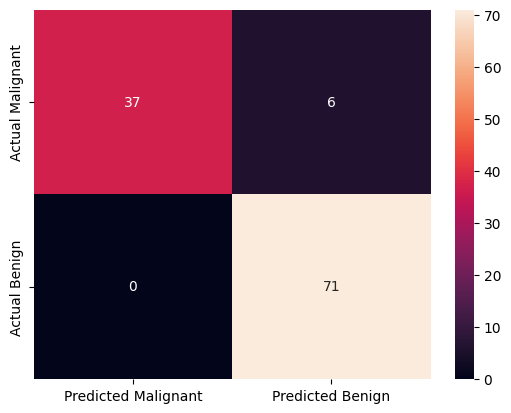

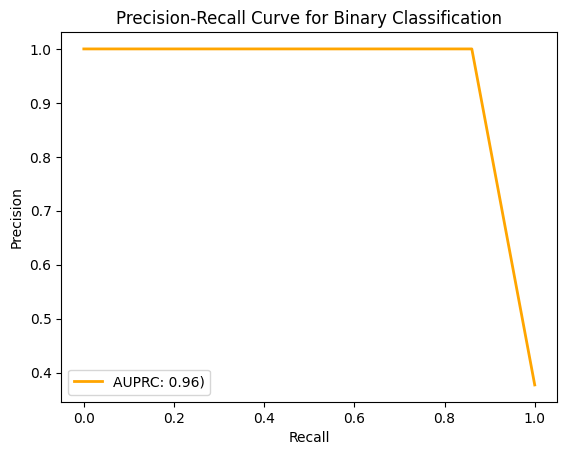

In [6]:
svm_train_predict(X2_train, X2_test, y2_train, y2_test, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X5_train, X5_test, y5_train, y5_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X10_train, X10_test, y10_train, y10_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X15_train, X15_test, y15_train, y15_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X20_train, X20_test, y20_train, y20_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X25_train, X25_test, y25_train, y25_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X30_train, X30_test, y30_train, y30_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-30 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n')

# Normalising the data

In [8]:
X2_train_scaled = (X2_train - X2_train.min())/(X2_train.max() - X2_train.min())
X5_train_scaled = (X5_train - X5_train.min())/(X5_train.max() - X5_train.min())
X10_train_scaled = (X10_train - X10_train.min())/(X10_train.max() - X10_train.min())
X15_train_scaled = (X15_train - X15_train.min())/(X15_train.max() - X15_train.min())
X20_train_scaled = (X20_train - X20_train.min())/(X20_train.max() - X20_train.min())
X25_train_scaled = (X25_train - X25_train.min())/(X25_train.max() - X25_train.min())
X30_train_scaled = (X30_train - X30_train.min())/(X30_train.max() - X30_train.min())

X2_test_scaled = (X2_test - X2_test.min())/(X2_test.max() - X2_test.min())
X5_test_scaled = (X5_test - X5_test.min())/(X5_test.max() - X5_test.min())
X10_test_scaled = (X10_test - X10_test.min())/(X10_test.max() - X10_test.min())
X15_test_scaled = (X15_test - X15_test.min())/(X15_test.max() - X15_test.min())
X20_test_scaled = (X20_test - X20_test.min())/(X20_test.max() - X20_test.min())
X25_test_scaled = (X25_test - X25_test.min())/(X25_test.max() - X25_test.min())
X30_test_scaled = (X30_test - X30_test.min())/(X30_test.max() - X30_test.min())

# SVM with Normalized data

x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.003001689910888672 seconds          Prediction time: 0.0010001659393310547 seconds


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.91      1.00      0.96        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



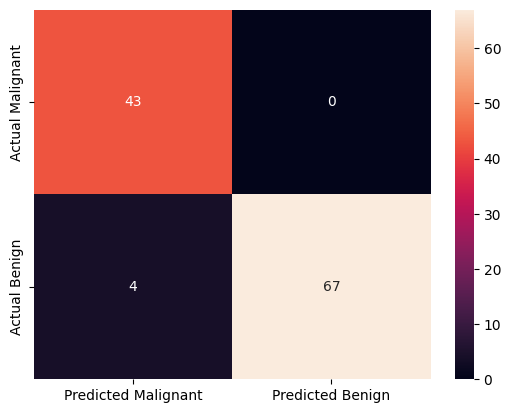

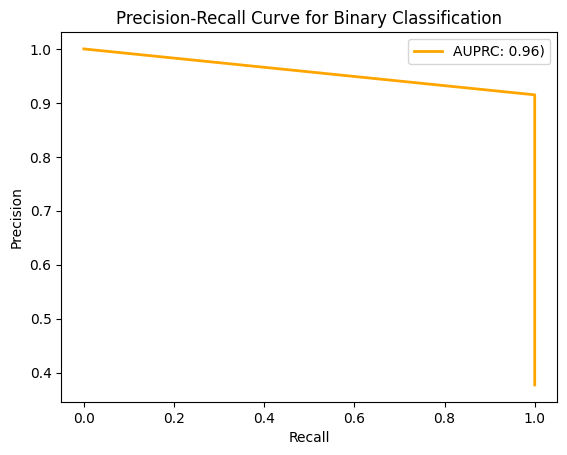

x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0035686492919921875 seconds          Prediction time: 0.0009434223175048828 seconds


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.93      1.00      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



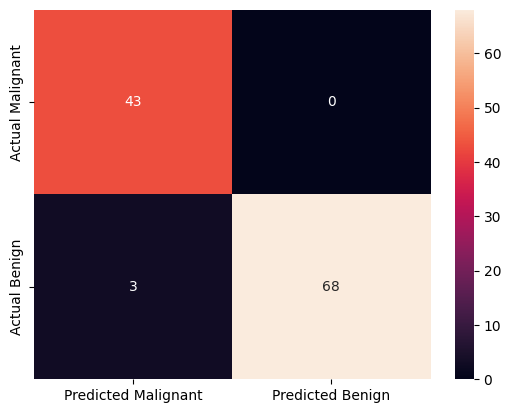

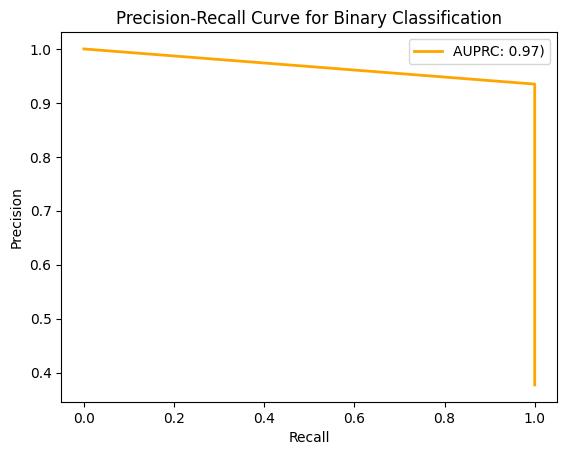

x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.003007173538208008 seconds          Prediction time: 0.0010001659393310547 seconds


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.93      1.00      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



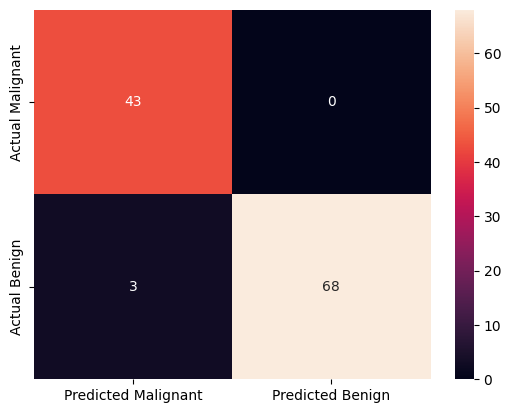

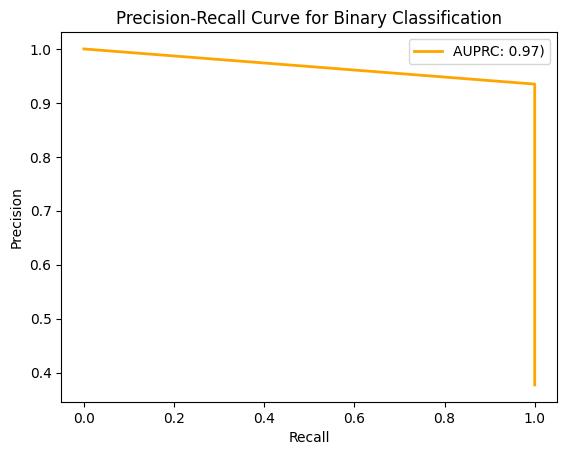

x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0020041465759277344 seconds          Prediction time: 0.0009980201721191406 seconds


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        71
           1       0.84      1.00      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



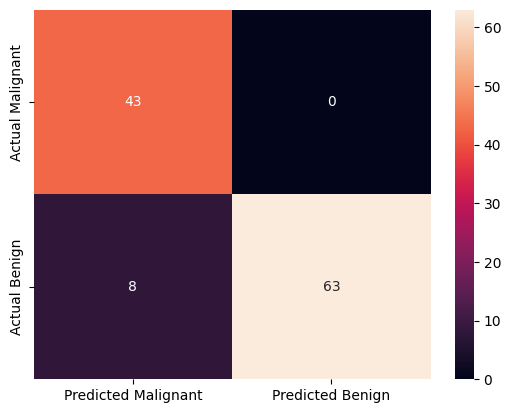

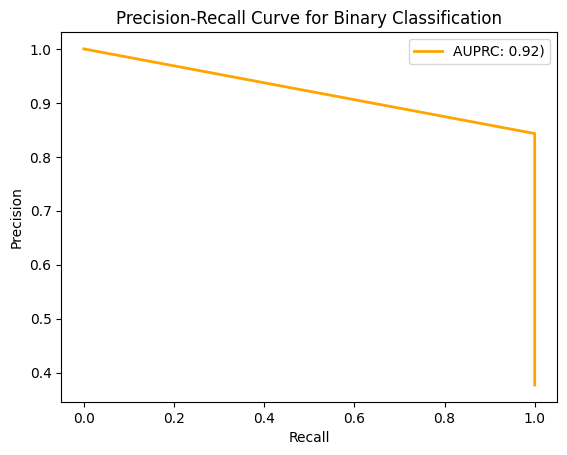

x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0030052661895751953 seconds          Prediction time: 0.000993967056274414 seconds


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        71
           1       0.81      1.00      0.90        43

    accuracy                           0.91       114
   macro avg       0.91      0.93      0.91       114
weighted avg       0.93      0.91      0.91       114



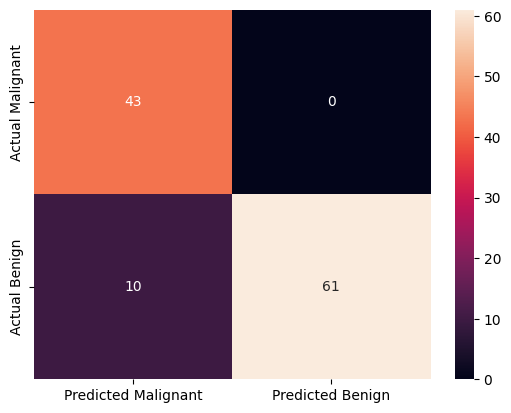

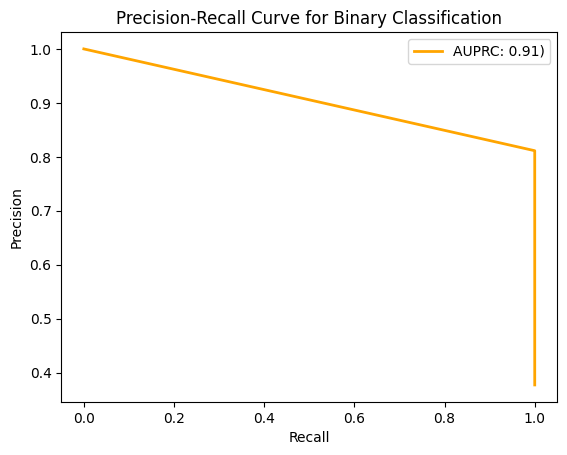

x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.004012107849121094 seconds          Prediction time: 0.0009968280792236328 seconds


              precision    recall  f1-score   support

           0       0.98      0.89      0.93        71
           1       0.84      0.98      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



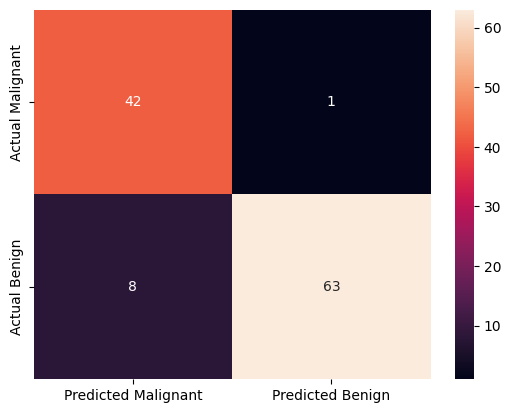

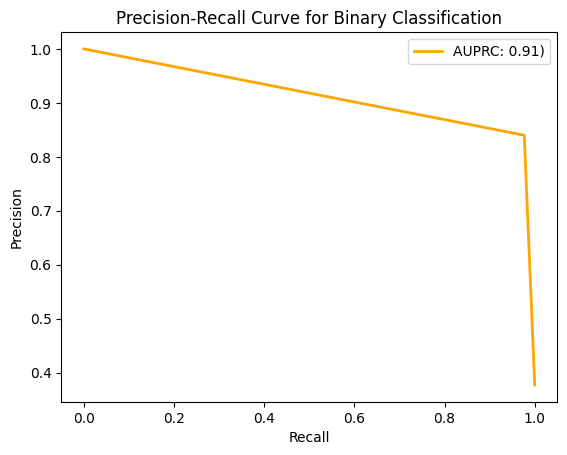



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-30 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Training time: 0.0030014514923095703 seconds          Prediction time: 0.0009992122650146484 seconds


              precision    recall  f1-score   support

           0       0.98      0.89      0.93        71
           1       0.84      0.98      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



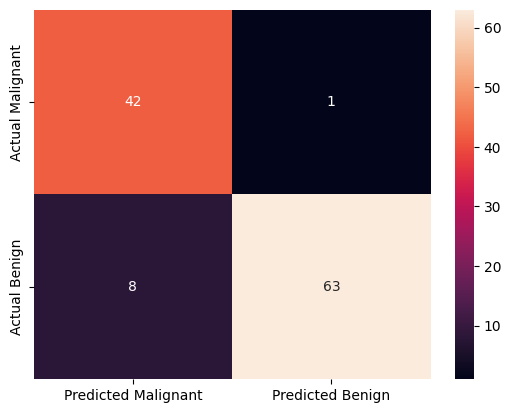

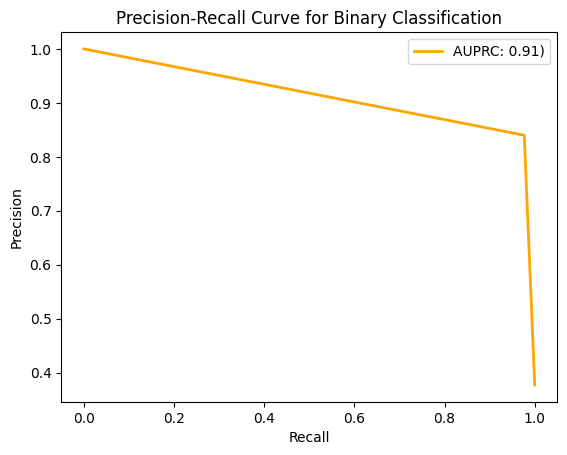

In [10]:
svm_train_predict(X2_train_scaled, X2_test_scaled, y2_train, y2_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X5_train_scaled, X5_test_scaled, y5_train, y5_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X10_train_scaled, X10_test_scaled, y10_train, y10_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X15_train_scaled, X15_test_scaled, y15_train, y15_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X20_train_scaled, X20_test_scaled, y20_train, y20_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X25_train_scaled, X25_test_scaled, y25_train, y25_test, 'x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_predict(X30_train_scaled, X30_test_scaled, y30_train, y30_test, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-30 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')

# SVM with cross-validation

In [46]:
def svm_train_pred_cv(X, y, info):
   
    print(info)
    
    # Instantiate the model
    svc_cv_model = SVC()

    # Perform cross-validation
    cv_scores = cross_val_score(svc_cv_model, X, y, cv = KFold(n_splits=10, shuffle = True, random_state = 20), scoring='accuracy')

    # Print the cross-validation results
    # print(f"Cross-validation scores:\n\n{cv_scores}")
    print(f"\nMean accuracy: {cv_scores.mean()*100:.2f} %")
    print(f"Standard deviation: {cv_scores.std():5f}")

    y_pred_cv = cross_val_predict(svc_cv_model, X, y, cv=KFold(n_splits=10, shuffle = True, random_state = 20))

    # Print the cross-validation results
    print("\n\nCross-Validation evaluation:\n")
    print(classification_report(y, y_pred_cv))
    
    sns.heatmap(pd.DataFrame(np.array(confusion_matrix(y, y_pred_cv, labels=[1,0])), index=['Actual Malignant', 'Actual Benign'], columns=['Predicted Malignant', 'Predicted Benign']),annot=True,fmt="d")
    
    precision, recall, _ = precision_recall_curve(y, y_pred_cv)

    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, lw=2, color='orange', label=f'AUPRC: {auc(recall, precision):.2f})')

    # Adding labels and title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Binary Classification')
    plt.legend(loc='best')
    plt.show()
    
    plt.show()

In [47]:
X30_scaled = (X30 - X30.min())/(X30.max() - X30.min())
X2_scaled = (X2 - X2.min())/(X2.max() - X2.min())
X5_scaled = (X5 - X5.min())/(X5.max() - X5.min())
X10_scaled = (X10 - X10.min())/(X10.max() - X10.min())
X15_scaled = (X15 - X15.min())/(X15.max() - X15.min())
X20_scaled = (X20 - X20.min())/(X20.max() - X20.min())
X25_scaled = (X25 - X25.min())/(X25.max() - X25.min())



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 91.57 %
Standard deviation: 0.050054


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       357
           1       0.92      0.84      0.88       212

    accuracy                           0.92       569
   macro avg       0.92      0.90      0.91       569
weighted avg       0.92      0.92      0.91       569



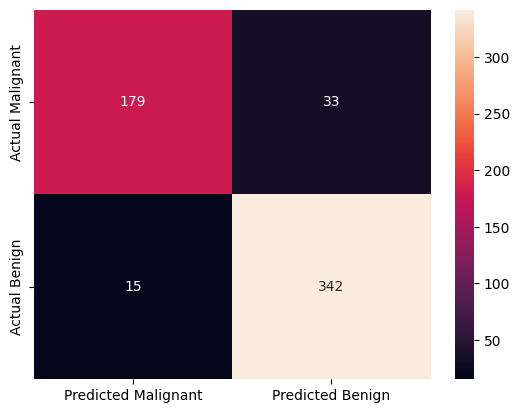

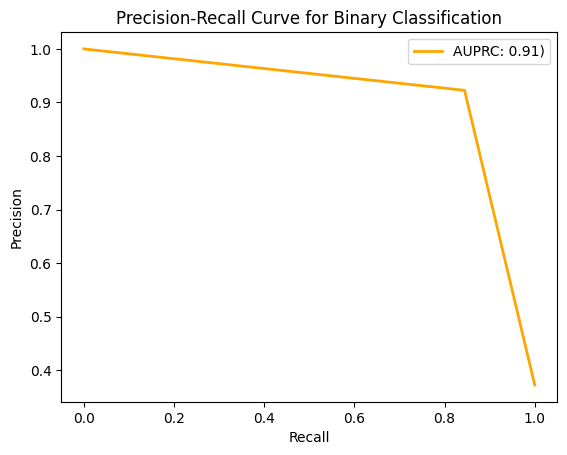



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 91.75 %
Standard deviation: 0.047695


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       357
           1       0.93      0.84      0.88       212

    accuracy                           0.92       569
   macro avg       0.92      0.90      0.91       569
weighted avg       0.92      0.92      0.92       569



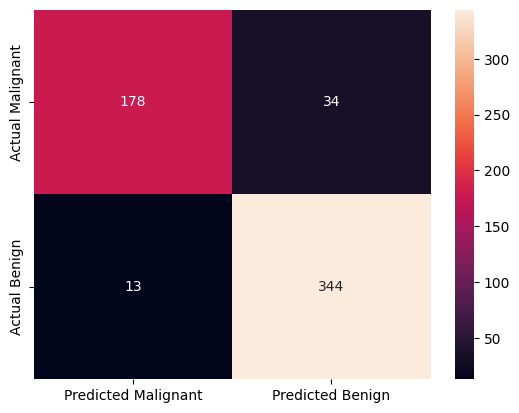

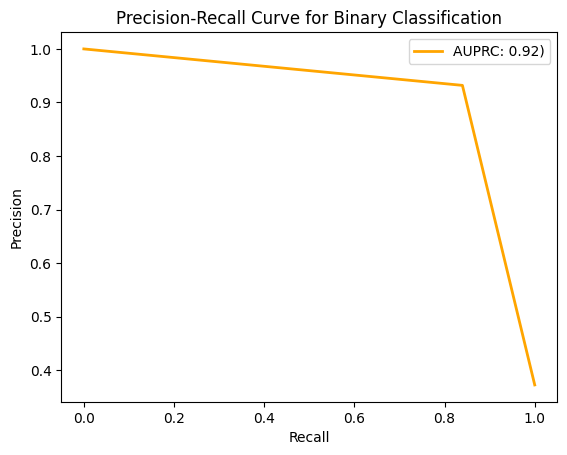



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 91.57 %
Standard deviation: 0.047534


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       357
           1       0.96      0.81      0.88       212

    accuracy                           0.92       569
   macro avg       0.93      0.89      0.91       569
weighted avg       0.92      0.92      0.91       569



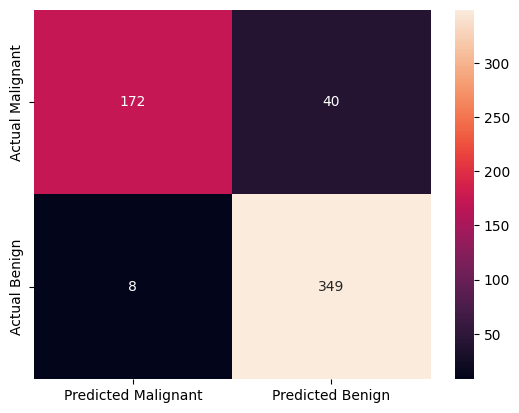

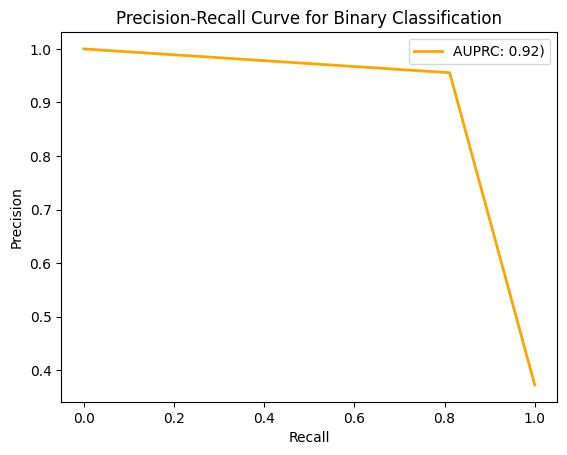



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 91.57 %
Standard deviation: 0.047534


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       357
           1       0.96      0.81      0.88       212

    accuracy                           0.92       569
   macro avg       0.93      0.89      0.91       569
weighted avg       0.92      0.92      0.91       569



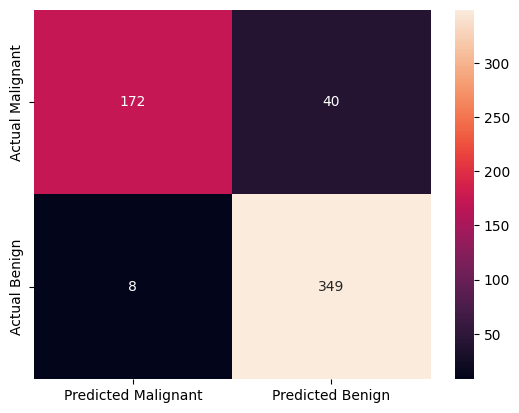

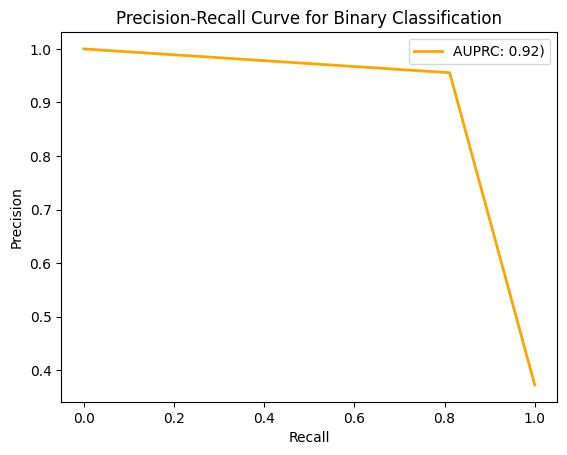



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 91.57 %
Standard deviation: 0.047534


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       357
           1       0.96      0.81      0.88       212

    accuracy                           0.92       569
   macro avg       0.93      0.89      0.91       569
weighted avg       0.92      0.92      0.91       569



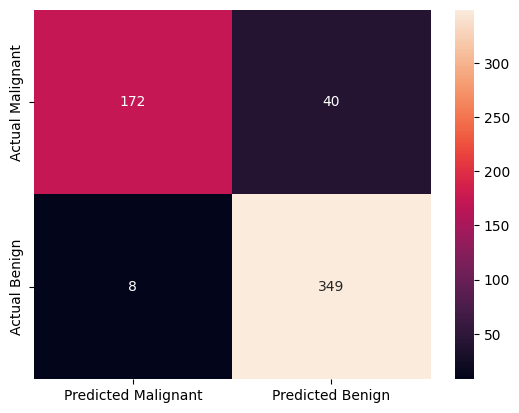

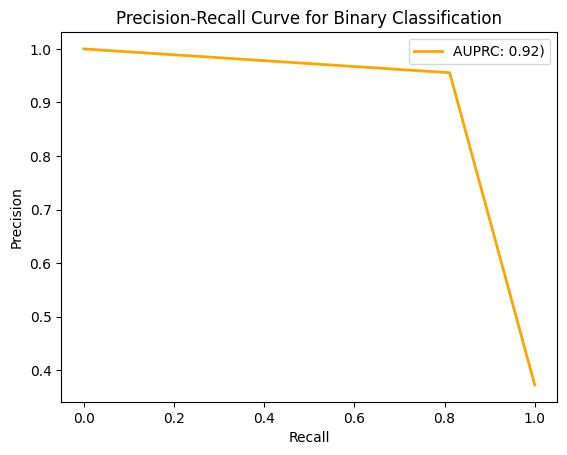



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 91.57 %
Standard deviation: 0.047534


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       357
           1       0.96      0.81      0.88       212

    accuracy                           0.92       569
   macro avg       0.93      0.89      0.91       569
weighted avg       0.92      0.92      0.91       569



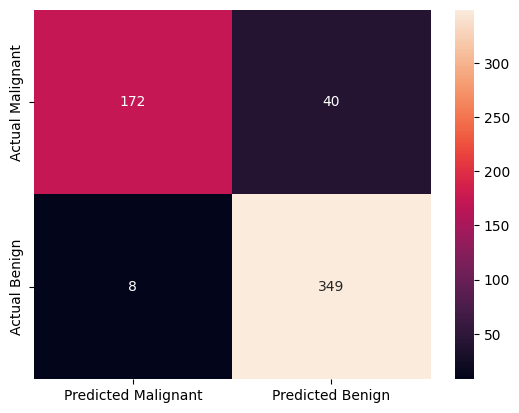

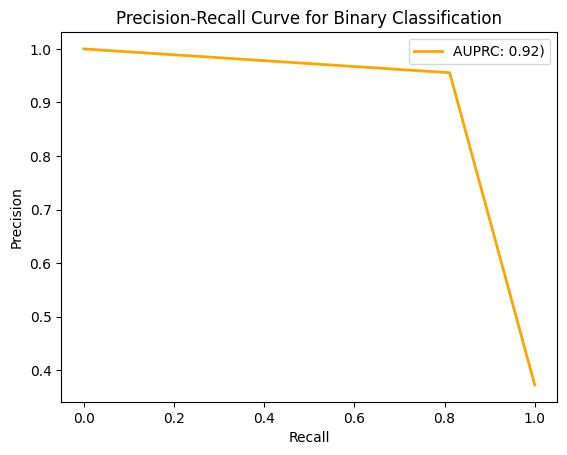



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-30 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 91.74 %
Standard deviation: 0.046390


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       357
           1       0.96      0.82      0.88       212

    accuracy                           0.92       569
   macro avg       0.93      0.90      0.91       569
weighted avg       0.92      0.92      0.92       569



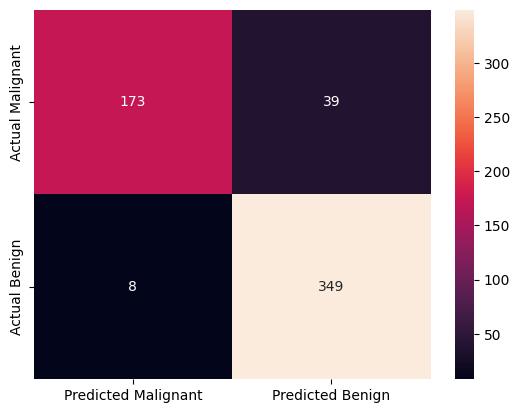

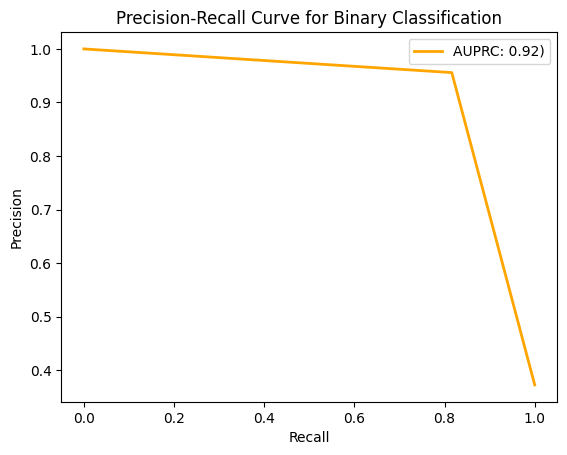

In [50]:
svm_train_pred_cv(X2, y2, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X5, y5, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X10, y10, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X15, y15, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X20, y20, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X25, y25, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X30, y30, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-30 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 93.68 %
Standard deviation: 0.030542


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.93      0.90      0.91       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



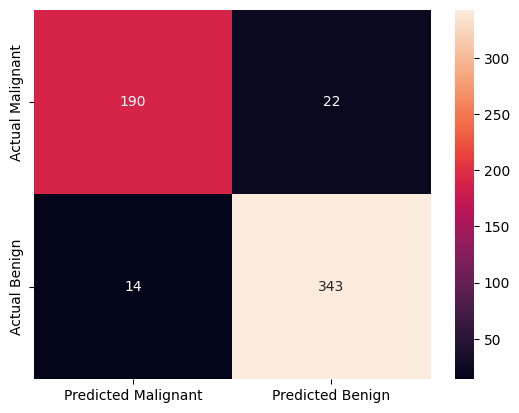

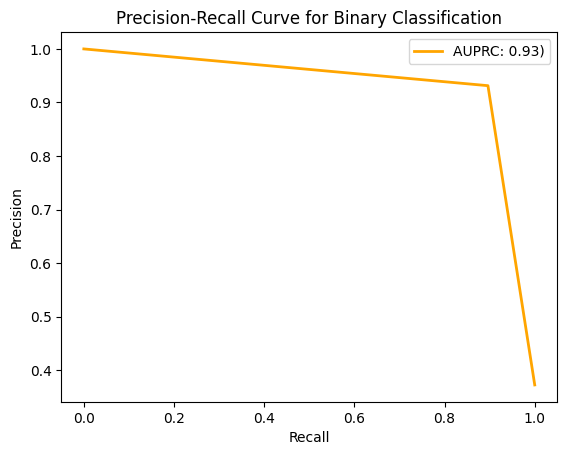



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 94.38 %
Standard deviation: 0.038245


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       357
           1       0.94      0.91      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.94      0.94      0.94       569



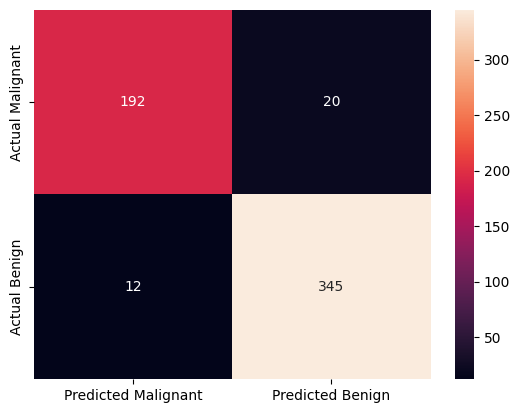

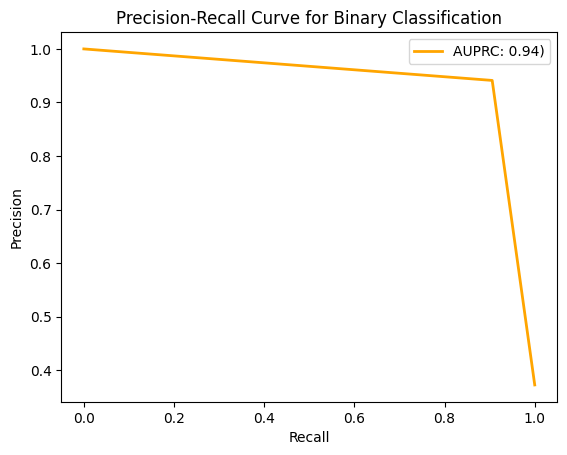



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 94.73 %
Standard deviation: 0.031349


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       357
           1       0.95      0.91      0.93       212

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.94       569
weighted avg       0.95      0.95      0.95       569



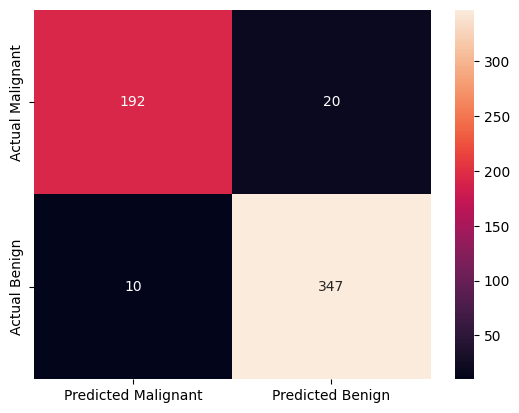

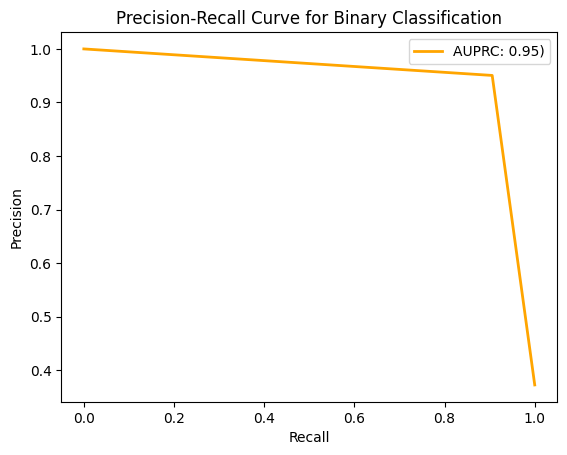



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 97.19 %
Standard deviation: 0.023817


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       357
           1       0.97      0.95      0.96       212

    accuracy                           0.97       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.97      0.97      0.97       569



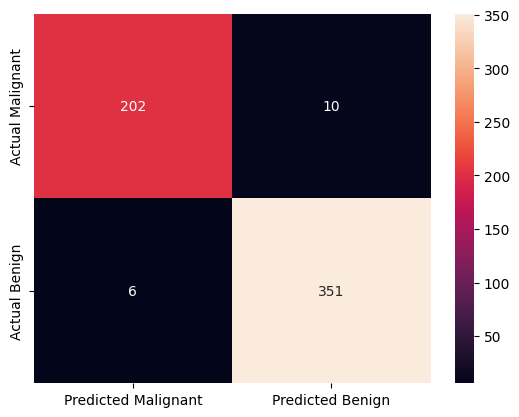

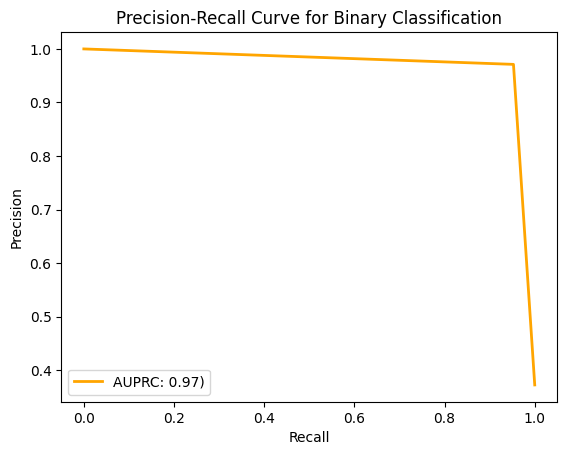



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 97.89 %
Standard deviation: 0.018943


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       357
           1       0.99      0.96      0.97       212

    accuracy                           0.98       569
   macro avg       0.98      0.97      0.98       569
weighted avg       0.98      0.98      0.98       569



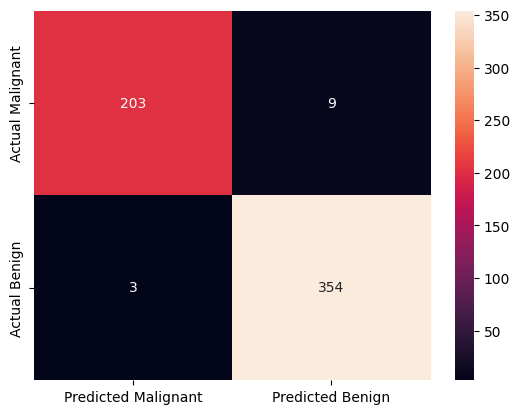

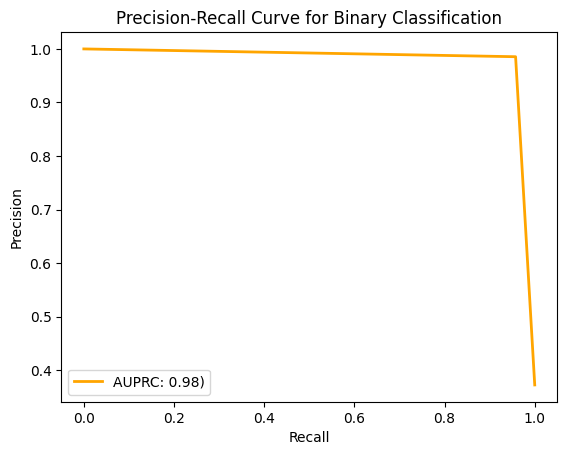



x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x


Mean accuracy: 97.89 %
Standard deviation: 0.018943


Cross-Validation evaluation:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       357
           1       0.99      0.96      0.97       212

    accuracy                           0.98       569
   macro avg       0.98      0.97      0.98       569
weighted avg       0.98      0.98      0.98       569



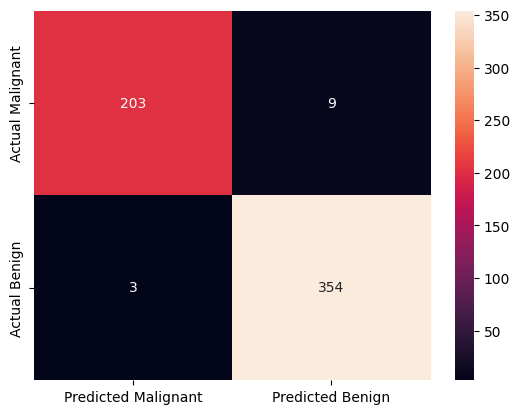

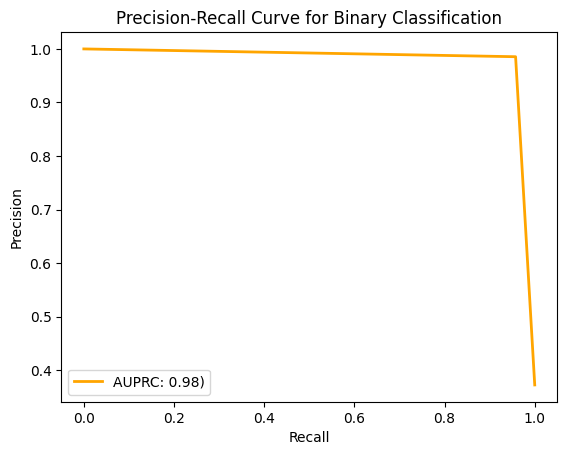

NameError: name 'y' is not defined

In [51]:
svm_train_pred_cv(X2_scaled, y2, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-2 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X5_scaled, y5, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X10_scaled, y10, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X15_scaled, y15, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-15 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X20_scaled, y20, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-20 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X25_scaled, y25, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-25 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')
svm_train_pred_cv(X30_scaled, y30, '\n\nx-x-x-x-x-x-x-x-x-x-x-x-x   SVM-30 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')

---

## Reference table of common classification metric terms and definitions

<br><br>

|  TERM | DESCRIPTION  |
|---|---|
|**TRUE POSITIVES** | The number of "true" classes correctly predicted to be true by the model. <br><br> `TP = Sum of observations predicted to be 1 that are actually 1`<br><br>The true class in a binary classifier is labeled with 1.|
|**TRUE NEGATIVES** | The number of "false" classes correctly predicted to be false by the model. <br><br> `TN = Sum of observations predicted to be 0 that are actually 0`<br><br>The false class in a binary classifier is labeled with 0.|
|**FALSE POSITIVES** | The number of "false" classes incorrectly predicted to be true by the model. This is the measure of **Type I error**.<br><br> `FP = Sum of observations predicted to be 1 that are actually 0`<br><br>Remember that the "true" and "false" refer to the veracity of your guess, and the "positive" and "negative" component refer to the guessed label.|
|**FALSE NEGATIVES** | The number of "true" classes incorrectly predicted to be false by the model. This is the measure of **Type II error.**<br><br> `FN = Sum of observations predicted to be 0 that are actually 1`<br><br>|
|**TOTAL POPULATION** | In the context of the confusion matrix, the sum of the cells. <br><br> `total population = tp + tn + fp + fn`<br><br>|
|**SUPPORT** | The marginal sum of rows in the confusion matrix, or in other words the total number of observations belonging to a class regardless of prediction. <br><br>|
|**ACCURACY** | The number of correct predictions by the model out of the total number of observations. <br><br> `accuracy = (tp + tn) / total_population`<br><br>|
|**PRECISION** | The ability of the classifier to avoid labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class.  precision score of 0 would mean that the classifier misclassified every instance of the current class_ |
|**RECALL/SENSITIVITY**    | The ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations of the class.  0 means the classifier predicted all observations of the current class incorrectly.|
|**SPECIFICITY** | Percent of times the classifier predicted 0 out of all the times the class was 0.<br><br> `specificity = tn / (tn + fp)`<br><br>|
|**FALSE POSITIVE RATE** | Percent of times model predicts 1 when the class is 0.<br><br> `fpr = fp / (tn + fp)`<br><br>|
|**F1-SCORE** | The harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. <br><br>`F1-Score = 2 * (Precision * Recall) / (Precision + Recall)` <br><br>_The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once._ |